In [1]:
# Steps:
####    1. Import Files
####    2. Crop
####    3. Augmentation

In [48]:
from imageImport import image_import
from imageCropping import crop_img
import matplotlib.pyplot as plt
from pylab import *
import keras
from keras import preprocessing
import cv2
import os
import numpy as np

In [6]:
# Training Data Hem Path
hemPath1 = "C:/Users/v4run/OneDrive/Desktop/Datasets/C-NMC_Leukemia/training_data/fold_1/hem"
hemPath2 = 'C:/Users/v4run/OneDrive/Desktop/Datasets/C-NMC_Leukemia/training_data/fold_0/hem'

In [10]:
# Training Data ALL Path
allPath1 = 'C:/Users/v4run/OneDrive/Desktop/Datasets/C-NMC_Leukemia/training_data/fold_1/all'
allPath2 = 'C:/Users/v4run/OneDrive/Desktop/Datasets/C-NMC_Leukemia/training_data/fold_0/all'

In [7]:
# Image import
hem = [hemPath1, hemPath2]
hemImages = []
hemLabel = []

for index, images in enumerate(hem):
    im, labels = image_import([images],['HEM'])
    hemImages.extend(im)
    hemLabel.extend(labels)

In [11]:
# Image import
all = [allPath1, allPath2]
allImages = []
allLabel = []

for index, images in enumerate(all):
    im, labels = image_import([images],['HEM'])
    allImages.extend(im)
    allLabel.extend(labels)

In [19]:
# Crop and resize image
hemImageCropped = []
for index, img in enumerate(hemImages):
    image = np.array(img)
    croppedImage = crop_img(image)
    image_resize = cv2.resize(croppedImage,(256,256), interpolation=cv2.INTER_LANCZOS4)
    hemImageCropped.append(image_resize)

In [21]:
# Crop and resize image
allImageCropped = []
for index, img in enumerate(allImages):
    image = np.array(img)
    croppedImage = crop_img(image)
    image_resize = cv2.resize(croppedImage,(256,256), interpolation=cv2.INTER_LANCZOS4)
    allImageCropped.append(image_resize)

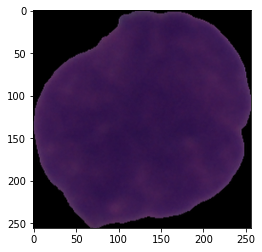

In [36]:
imshow(allImageCropped[0])

In [ ]:
os.mkdir()

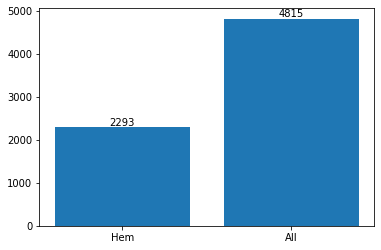

In [43]:
# Data Imbalance
y = [len(hemImageCropped),len(allImageCropped)]
x = ['Hem','All']
plt.bar(x,y)

for i, count in enumerate([len(hemImageCropped),len(allImageCropped)]):
    plt.text(x=i, y=count, s=str(count), ha='center', va='bottom')

plt.show()

In [49]:
imgGen = preprocessing.image.ImageDataGenerator(
                                                            rotation_range=60, # image rotation range
                                                            width_shift_range=0, # horizontal shift during augmentation
                                                            height_shift_range=0, # vertical shift during augmentation
                                                            shear_range=0.1, # shear angle shift during augmentation
                                                            zoom_range=0.3, # image zoom-in or out during augmentation
                                                            horizontal_flip=True,
                                                            fill_mode='constant',
                                                            cval=0,
                                                            vertical_flip=True
                                                    )

In [50]:
hemImageArray = np.array(hemImageCropped)

In [51]:
hemBalancing =  imgGen.flow(hemImageArray,batch_size=32)

In [52]:
hemRemainingImages = []

imgCount = 0
while imgCount <= 2510:
    images = next(hemBalancing)
    imgCount +=len(images)
    hemRemainingImages.extend(images)

In [59]:
# Image conversion back to normal (float32 to uint8)
hemImageCorrection = []

for idx, img in enumerate(hemRemainingImages):
    image = img.astype(np.uint8)
    
    hemImageCorrection.append(image)

In [67]:
hemImageBalancing = np.concatenate((hemImageArray,hemImageCorrection),axis=0)

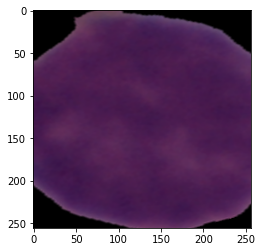

In [70]:
imshow(hemImageBalancing[2500])

In [71]:
hemImageBalancing.shape

(4810, 256, 256, 3)

In [74]:
len(allImageCropped)

4815